In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# disable column wrap
pd.set_option('display.expand_frame_repr', False)

df = pd.read_csv('model_results.csv')

In [2]:
print(df)

                    model_name    class_name  input_size  output_size  hidden_size  num_layers   transform           mse
0     GRU_1_1_128_4_normalized           GRU           1            1          128           4  normalized  1.654605e-03
1     GRU_1_1_128_4_stationary           GRU           1            1          128           4  stationary  5.139635e-05
2     GRU_1_1_256_4_normalized           GRU           1            1          256           4  normalized  1.668506e-03
3     GRU_1_1_256_4_stationary           GRU           1            1          256           4  stationary  5.194786e-05
4     GRU_1_1_256_8_normalized           GRU           1            1          256           8  normalized  1.670366e-03
5     GRU_1_1_256_8_stationary           GRU           1            1          256           8  stationary  5.140972e-05
6     GRU_5_1_128_4_normalized           GRU           5            1          128           4  normalized  1.654466e-03
7     GRU_5_1_128_4_stationary  

In [3]:
best_models = df.loc[df.groupby(['transform', 'input_size', 'output_size'])['mse'].idxmin()]
print(best_models)

                    model_name    class_name  input_size  output_size  hidden_size  num_layers   transform           mse
0     GRU_1_1_128_4_normalized           GRU           1            1          128           4  normalized  1.654605e-03
8     GRU_5_1_256_4_normalized           GRU           5            1          256           4  normalized  1.647394e-03
13    GRU_5_4_128_4_normalized           GRU           5            4          128           4  normalized  1.170953e-03
50  LSTM_61_4_256_8_normalized          LSTM          61            4          256           8  normalized  2.329445e-03
1     GRU_1_1_128_4_stationary           GRU           1            1          128           4  stationary  5.139635e-05
9     GRU_5_1_256_4_stationary           GRU           5            1          256           4  stationary  5.105854e-05
40   LSTM_5_4_128_4_stationary          LSTM           5            4          128           4  stationary  3.768747e-05
59  LSTM_tower_61_4_stationary  

In [4]:
# for comparison against statistic
err_df = pd.read_csv('results/errors.csv')
err_df['msef5'] = err_df['mse'].round(5)
print(err_df)

           model_stock        mse     msef5
0           gru_APO_1h   0.291839   0.29184
1    lstm_tower_APO_1h   0.292129   0.29213
2           gru_BIO_1h  16.979032  16.97903
3    lstm_tower_BIO_1h  16.977490  16.97749
4           gru_CMA_1h   1.294231   1.29423
5    lstm_tower_CMA_1h   1.294936   1.29494
6           gru_DXC_1h   0.039455   0.03945
7    lstm_tower_DXC_1h   0.039488   0.03949
8          gru_ETSY_1h   1.534144   1.53414
9   lstm_tower_ETSY_1h   1.533430   1.53343
10         gru_FERG_1h   0.633129   0.63313
11  lstm_tower_FERG_1h   0.635239   0.63524
12          gru_TTD_1h   0.589592   0.58959
13   lstm_tower_TTD_1h   0.589097   0.58910
14         gru_VEEV_1h   2.095983   2.09598
15  lstm_tower_VEEV_1h   2.095221   2.09522


In [5]:
# rename files
# import os


# dirs = ['trained_stationary', 'trained_normalized']
# for d in dirs:
#     for f in os.listdir(d):
#         # class_input_hidden_depth_output_junk... -> class_input_output_hidden_depth_transform
#         parts = f.split('_')
#         if len(parts) == 5:
#             parts = [parts[0] + '_' + parts[1], parts[-3], parts[-2], d.split('_')[1]]
#             new_name = '_'.join(parts)
#             os.rename(os.path.join(d, f), os.path.join(d, new_name))
#         else:
#             parts = [parts[0], parts[1], parts[-2], parts[2], parts[-3], d.split('_')[1]]
#             new_name = '_'.join(parts)
#             os.rename(os.path.join(d, f), os.path.join(d, new_name))


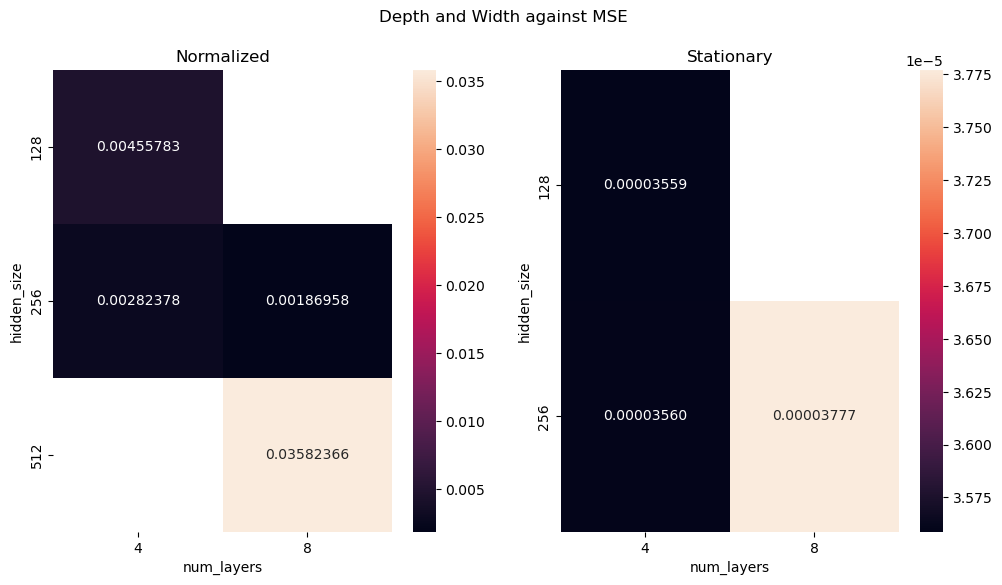

In [6]:
# depth and width against mse, heatmap, normalized and stationary
normalized_df = df[df['transform'] == 'normalized']
stationary_df = df[df['transform'] == 'stationary']
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(normalized_df.pivot_table(index='hidden_size', columns='num_layers', values='mse'), annot=True, fmt=".8f", ax=ax[0])
ax[0].set_title('Normalized')
sns.heatmap(stationary_df.pivot_table(index='hidden_size', columns='num_layers', values='mse'), annot=True, fmt=".8f", ax=ax[1])
ax[1].set_title('Stationary')
plt.suptitle('Depth and Width against MSE')
plt.show()

In [ ]:
tmp = df[['class_name', 'input_size', 'output_size', 'hidden_size', 'num_layers', 'transform', 'mse']][df['transform'] == 'normalized']
# normalized['mse'] = normalized['mse'].round(10)
print(tmp)

      class_name  input_size  output_size  hidden_size  num_layers   transform       mse
0            GRU           1            1          128           4  normalized  0.001655
2            GRU           1            1          256           4  normalized  0.001669
4            GRU           1            1          256           8  normalized  0.001670
6            GRU           5            1          128           4  normalized  0.001654
8            GRU           5            1          256           4  normalized  0.001647
10           GRU           5            1          256           8  normalized  0.001666
12           GRU           5            1          512           8  normalized  0.001669
13           GRU           5            4          128           4  normalized  0.001171
15           GRU           5            4          256           4  normalized  0.001173
17           GRU           5            4          256           8  normalized  0.001258
19           GRU     

In [12]:
tmp = df[['class_name', 'input_size', 'output_size', 'hidden_size', 'num_layers', 'transform', 'mse']][df['transform'] == 'stationary']
# normalized['mse'] = normalized['mse'].round(10)
print(tmp)

      class_name  input_size  output_size  hidden_size  num_layers   transform           mse
1            GRU           1            1          128           4  stationary  5.139635e-05
3            GRU           1            1          256           4  stationary  5.194786e-05
5            GRU           1            1          256           8  stationary  5.140972e-05
7            GRU           5            1          128           4  stationary  5.180229e-05
9            GRU           5            1          256           4  stationary  5.105854e-05
11           GRU           5            1          256           8  stationary  5.203900e-05
14           GRU           5            4          128           4  stationary  3.928810e-05
16           GRU           5            4          256           4  stationary  3.886502e-05
18           GRU           5            4          256           8  stationary  3.838287e-05
21           GRU          61            4          128           4  st

In [20]:
import os

data_files = os.listdir('data/sp500')
zeros_dct = {}
for file in data_files:
    df = pd.read_csv(f'data/sp500/{file}')
    vol = df['Volume']
    zeros_dct[file.split('.')[0]] = vol[vol == 0].count()
zeros_df = pd.DataFrame(zeros_dct.items(), columns=['stock', 'zeros'])
zeros_df = zeros_df.sort_values('zeros', ascending=False)[zeros_df['zeros'] > 0].reset_index(drop=True)
print(zeros_df)

        stock  zeros
0     CBOE_1h     30
1      IEX_1h     22
2     ERIE_1h     18
3      COO_1h      9
4      AVY_1h      8
..        ...    ...
149   ADBE_1h      1
150    AVB_1h      1
151    CME_1h      1
152  CMCSA_1h      1
153   MKTX_1h      1

[154 rows x 2 columns]


C:\Users\janic\AppData\Local\Temp\ipykernel_3652\2086288569.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zeros_df = zeros_df.sort_values('zeros', ascending=False)[zeros_df['zeros'] > 0].reset_index(drop=True)


In [ ]:
# count zeros per column
data_files = os.listdir('data/sp500')
zeros_dct = {}
for file in data_files:
    df = pd.read_csv(f'data/sp500/{file}')
    stock = file.split('.')[0]
    zeros_dct[stock] = {}
    for col in df.columns:
        zeros_dct[stock][col] = df[col][df[col] == 0].count()
zeros_df = pd.DataFrame(zeros_dct).T
zeros_df = zeros_df.sort_values('Volume', ascending=False)
print(zeros_df)

# count zeros per column
print(zeros_df.sum())   
# 340 rows show up, signifying that there are 340 stocks in the dataset
# 4 of those stocks fail to load in the Distributed Dataset

         Datetime  Open  High  Low  Close  Volume
CBOE_1h         0     0     0    0      0      30
IEX_1h          0     0     0    0      0      22
ERIE_1h         0     0     0    0      0      18
COO_1h          0     0     0    0      0       9
AVY_1h          0     0     0    0      0       8
...           ...   ...   ...  ...    ...     ...
EMN_1h          0     0     0    0      0       0
EMR_1h          0     0     0    0      0       0
EOG_1h          0     0     0    0      0       0
EPAM_1h         0     0     0    0      0       0
XOM_1h          0     0     0    0      0       0

[340 rows x 6 columns]
Datetime      0
Open          0
High          0
Low           0
Close         0
Volume      324
dtype: int64
